In [1]:
import plot_map
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

### 数据预处理

In [2]:
path = r"D:\edge_download\TaxiData-Sample"

In [3]:
data = pd.read_csv(path, header=None, names=['VehicleNum', 'Stime', 'Lng', 'Lat', 'OpenStatus', 'Speed'])

In [4]:
data = data.query('Lng > 113.7 & Lng < 114.3 & Lat > 22.42 & Lat < 22.8').copy() #  筛选一个经纬度范围

In [5]:
data.head()

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed
0,22271,22:54:04,114.167000,22.718399,0,0
1,22271,18:26:26,114.190598,22.647800,0,4
2,22271,18:35:18,114.201401,22.649700,0,0
3,22271,16:02:46,114.233498,22.725901,0,24
4,22271,21:41:17,114.233597,22.720900,0,19


In [6]:
# 经纬度小数点保留三位小数， 集计每个小范围内的数据量， 
# 并将数据排序，让数据量小的放上面先画，数据大的放下面最后画
data2 = data.groupby([data['Lng'].round(3), data['Lat'].round(3)]).size().reset_index()
data2.rename(columns={0: 'count'}, inplace=True)
data2.sort_values(by='count', inplace=True)

In [7]:
data2.head()

,Lng,Lat,count
0,113.701,22.779,1
6172,113.900,22.597,1
25018,114.125,22.595,1
25020,114.125,22.604,1
25046,114.125,22.646,1


### 热力图可视化

In [8]:
data2.head().pivot_table(index='Lat', columns='Lng', values='count')

Lng,113.701,113.900,114.125
Lat,,,
22.595,NaN,NaN,1.0
22.597,NaN,1.0,NaN
22.604,NaN,NaN,1.0
22.646,NaN,NaN,1.0
22.779,1.0,NaN,NaN


In [9]:
d = data2.pivot_table(index='Lat', columns='Lng', values='count', fill_value=0)

x = d.columns
y = d.index
z = np.log(d.values + 1e-5) # 
# z = d.values
# z = d.applymap(np.log).values
levels = np.linspace(0, z.max(), 25)

In [10]:
bounds = [113.7, 22.42, 114.3, 22.8]

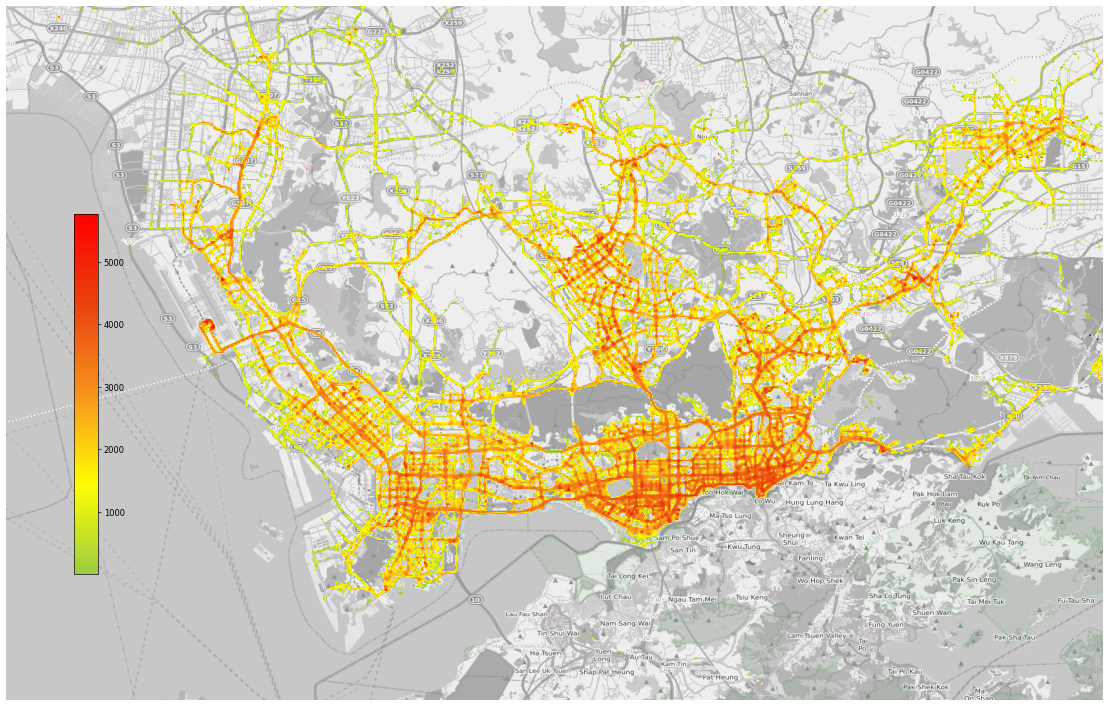

In [11]:
fig = plt.figure(figsize=(20, 20), dpi=60)
ax = plt.subplot(111)
plt.sca(ax)
fig.tight_layout(rect = (0.05, 0.1, 1, 0.9))

plot_map.plot_map(plt, bounds, zoom=12, style=4)

cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#9DCC42','#FFFE03','#F7941D','#E9420E','#FF0000'], 256)
plt.contourf(x, y, z, levels=levels, cmap=cmap, origin='lower')


plt.axis('off')
plt.xlim(bounds[0], bounds[2])
plt.ylim(bounds[1], bounds[3])

# 绘制colorbar
plt.imshow([np.exp(levels)], cmap=cmap)
cax = plt.axes([0.13, 0.32, 0.02, 0.3])
plt.colorbar(cax=cax)

plt.show()